In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Exploration

In [7]:
df_house_price = pd.read_csv('c:/users/tenoc/documents/datasets/chicago_price_data/houseprice.csv')
df_house_price.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [8]:
#there are 157 columns and 9 features
df_house_price.shape

(157, 9)

In [9]:
#descriptive stats
df_house_price.describe(include = 'all')

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [10]:
df_house_price.dtypes

Price        float64
Bedroom      float64
Space        float64
Room         float64
Lot          float64
Tax          float64
Bathroom     float64
Garage       float64
Condition    float64
dtype: object

In [11]:
#checking for any missing values
pd.isnull(df_house_price).sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [12]:
#dealing with missing values through imputation
df_house_price.fillna(df_house_price.mean(), inplace = True)

In [13]:
#no more mising values
pd.isnull(df_house_price).sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [14]:
#correlation matrix to check R values
df_house_price.corr()


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.302451,0.709174,0.578480,0.435381,0.493987,0.538485,0.553105,0.079336
Bedroom,0.302451,1.000000,0.569522,0.825630,0.314857,0.027496,0.546929,0.177596,-0.090582
Space,0.709174,0.569522,1.000000,0.744819,0.389862,0.542282,0.567528,0.382232,0.080498
Room,0.578480,0.825630,0.744819,1.000000,0.457210,0.117553,0.687434,0.300106,0.054667
Lot,0.435381,0.314857,0.389862,0.457210,1.000000,0.166208,0.387924,0.161835,-0.055720
Tax,0.493987,0.027496,0.542282,0.117553,0.166208,1.000000,-0.019595,0.375961,-0.144192
Bathroom,0.538485,0.546929,0.567528,0.687434,0.387924,-0.019595,1.000000,0.264371,-0.066534
Garage,0.553105,0.177596,0.382232,0.300106,0.161835,0.375961,0.264371,1.000000,0.104565
Condition,0.079336,-0.090582,0.080498,0.054667,-0.055720,-0.144192,-0.066534,0.104565,1.000000


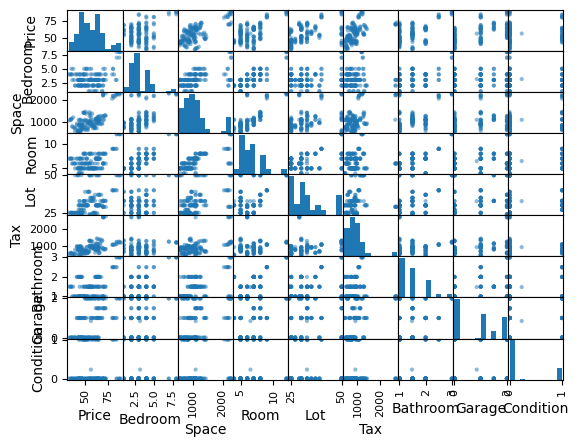

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_house_price)
plt.show()

Checking Distributions

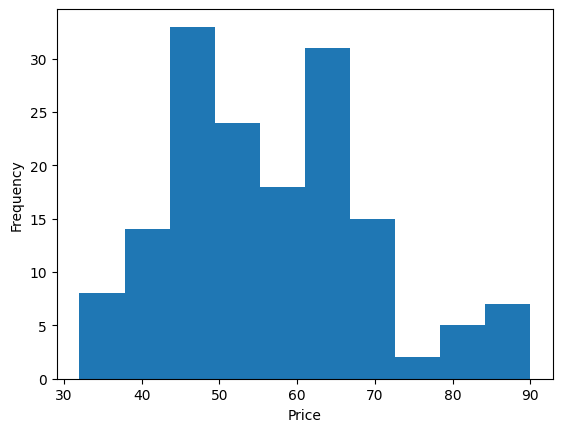

In [16]:
df_house_price['Price'].plot(kind = 'hist', bins = 10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

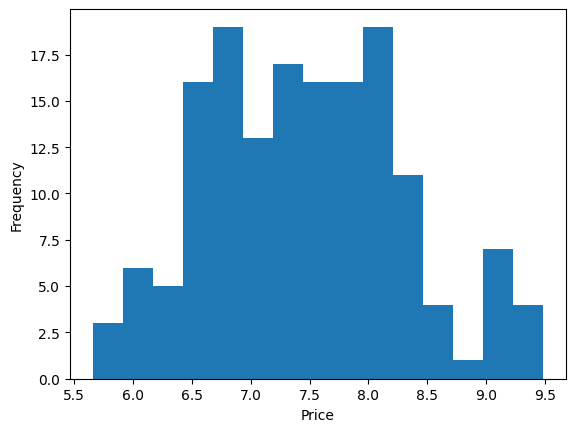

In [17]:
#trying transformation
df_house_price['Price'].apply(np.sqrt).plot(kind = 'hist', bins = 15)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

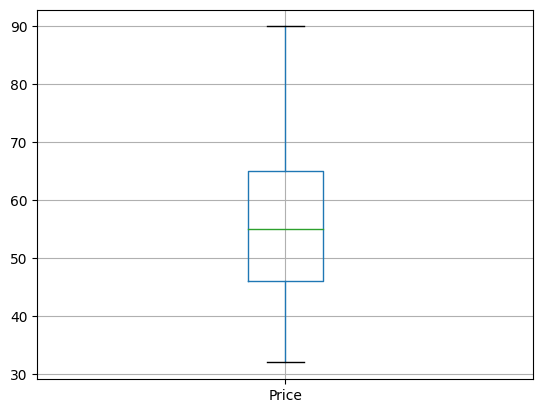

In [18]:
df_house_price.boxplot('Price')
plt.show()

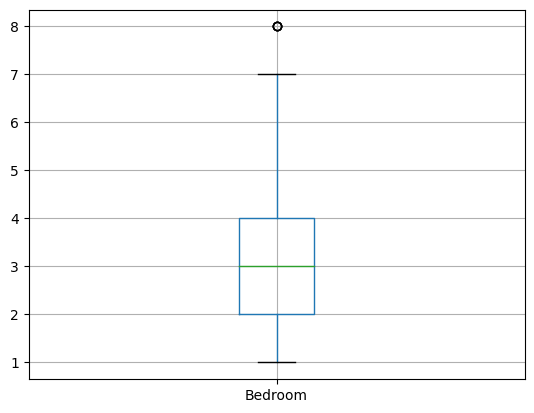

In [19]:
df_house_price.boxplot('Bedroom')
plt.show()

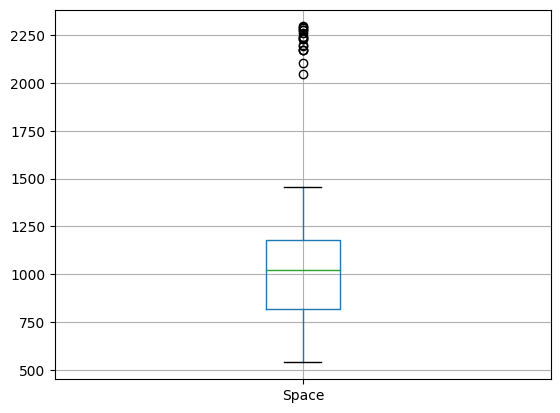

In [20]:
df_house_price.boxplot('Space')
plt.show()

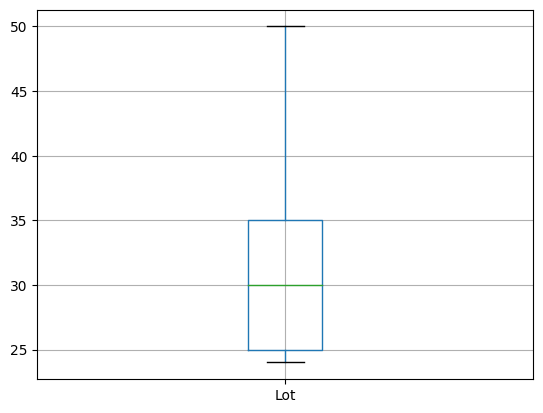

In [21]:
df_house_price.boxplot('Lot')
plt.show()

In [22]:
#getting list of outliers
def outlier_list(feature):
    Q1 = df_house_price[feature].quantile(0.25)
    Q3 = df_house_price[feature].quantile(0.75)
    iqr = (Q3 - Q1)
    lower_lim = Q1 - iqr * 1.5
    upper_lim = Q3 + iqr * 1.5

    outliers = df_house_price.loc[(df_house_price[feature] < lower_lim) | (df_house_price[feature] > upper_lim), feature]
    return outliers

print('Tax', outlier_list('Tax'))
print('Price', outlier_list('Price'))
print('Bedroom', outlier_list('Bedroom'))
print('Space', outlier_list('Space'))
print('Lot', outlier_list('Lot'))

Tax 7      2700.0
33     2727.0
59     2688.0
85     2687.0
111    2752.0
137    2711.0
Name: Tax, dtype: float64
Price Series([], Name: Price, dtype: float64)
Bedroom 10     8.0
36     8.0
88     8.0
114    8.0
Name: Bedroom, dtype: float64
Space 7      2261.0
9      2104.0
10     2240.0
33     2230.0
35     2173.0
36     2278.0
59     2191.0
61     2171.0
62     2295.0
87     2045.0
88     2228.0
111    2287.0
113    2170.0
114    2293.0
137    2196.0
139    2240.0
140    2277.0
Name: Space, dtype: float64
Lot Series([], Name: Lot, dtype: float64)


Feature selection and data split

In [23]:
house_price_names = df_house_price.columns.values
house_price_names

array(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom',
       'Garage', 'Condition'], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split
y = df_house_price['Price']
x = df_house_price[house_price_names[1:]]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=117)

Training and testing

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print('Coefficients: ', lin_reg.coef_)
print('Interecept: ',lin_reg.intercept_)
#these coefficients need to be tranformed

Coefficients:  [-3.77576765e+00  5.18573744e-03  3.33532877e+00  1.88958281e-01
  7.13622798e-03  5.72540586e+00  4.44075435e+00  1.39843423e+00]
Interecept:  15.4010277442244


In [50]:
coefficents = lin_reg.coef_
transformed_coef = np.square(coefficents)
coef = pd.DataFrame(transformed_coef, x.columns)
coef.columns = ['coefficients']
coef

,coefficients
Bedroom,14.256421
Space,0.000027
Room,11.124418
Lot,0.035705
Tax,0.000051
Bathroom,32.780272
Garage,19.720299
Condition,1.955618


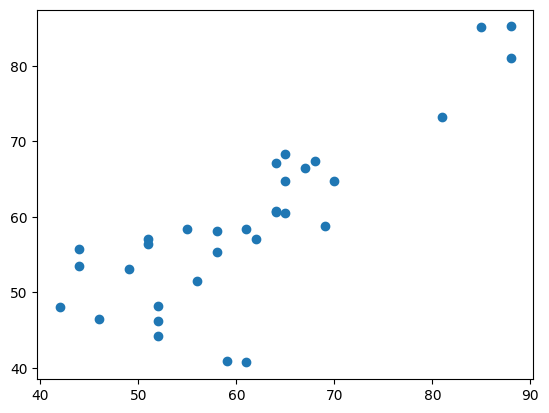

In [26]:
#scatter plot of actual vs predicted values
y_pred = lin_reg.predict(x_test)
plt.scatter(y_test, y_pred)

In [29]:
#performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 49.2775390909772
R-squared: 0.6552134577651099
Mean Absolute Error: 5.296199088098659


Feature Selection